In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import matplotlib.gridspec as gridspec
from magpie_data import NeLMap2
import csv

In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION


In [3]:
s0506_15_532=NeLMap2('s0506_15 532nm neL.txt', scale=174, multiply_by=1/1.6, rot_angle=-90)

<IPython.core.display.Javascript object>


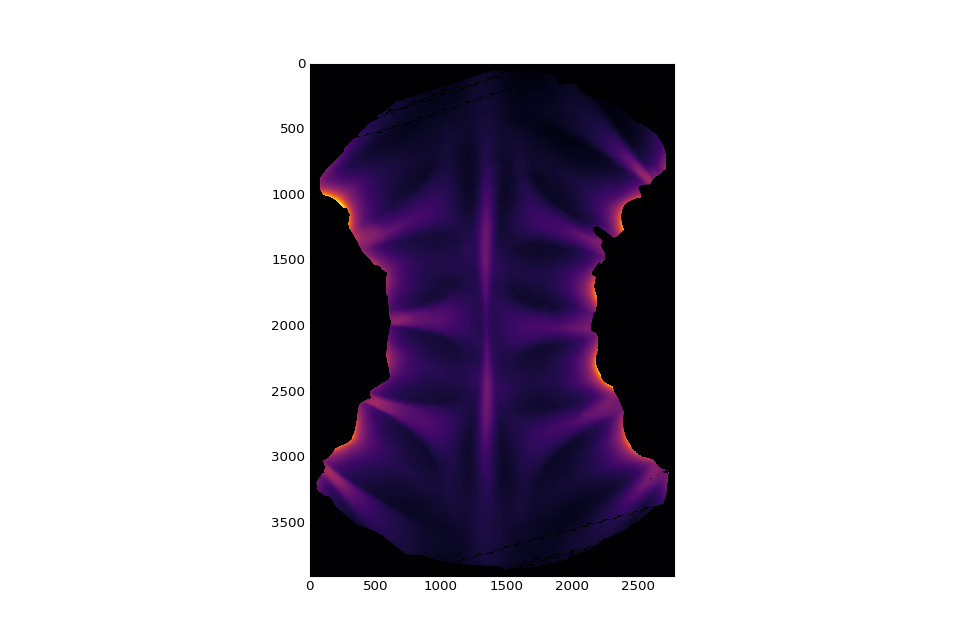

In [58]:
s=s0506_15_532
s.plot_data_px()

<IPython.core.display.Javascript object>


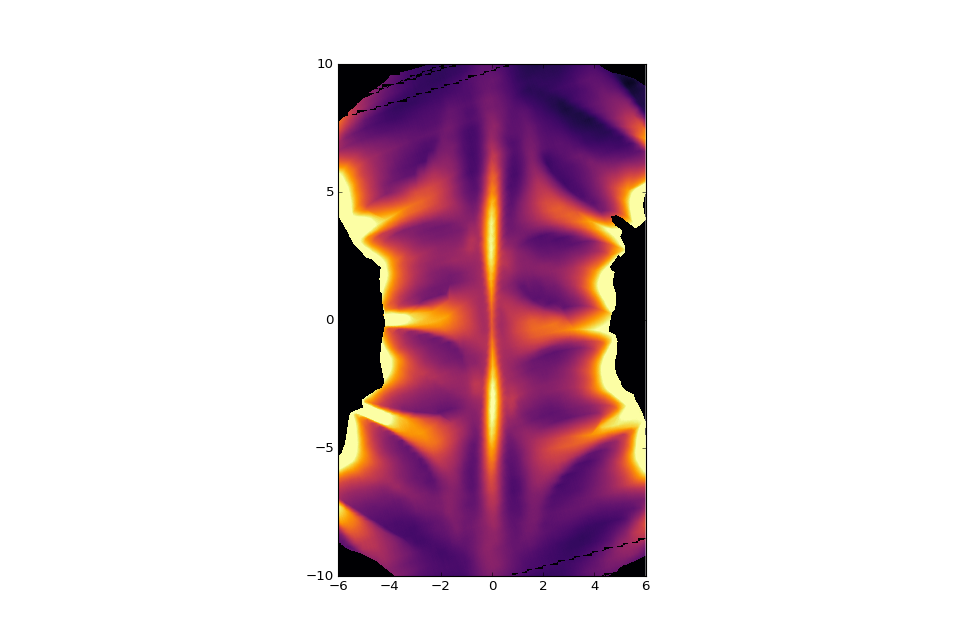

In [59]:
s.set_origin(origin=(1954,1341),extent=[-10,10,-6,6])
s.plot_data_mm(clim=[0,1e18])

In [21]:
s.create_lineout(start=(0,-3), end=(0,3), lineout_width=0.5*s.scale)
s.plot_lineout()

(1740, 696) (1740, 1740)


In [63]:
s0506_15_355=NeLMap2('s0506_15 355nm neL.txt', scale=128, multiply_by=1/1.6, rot_angle=-88, flip_lr=True)

<IPython.core.display.Javascript object>


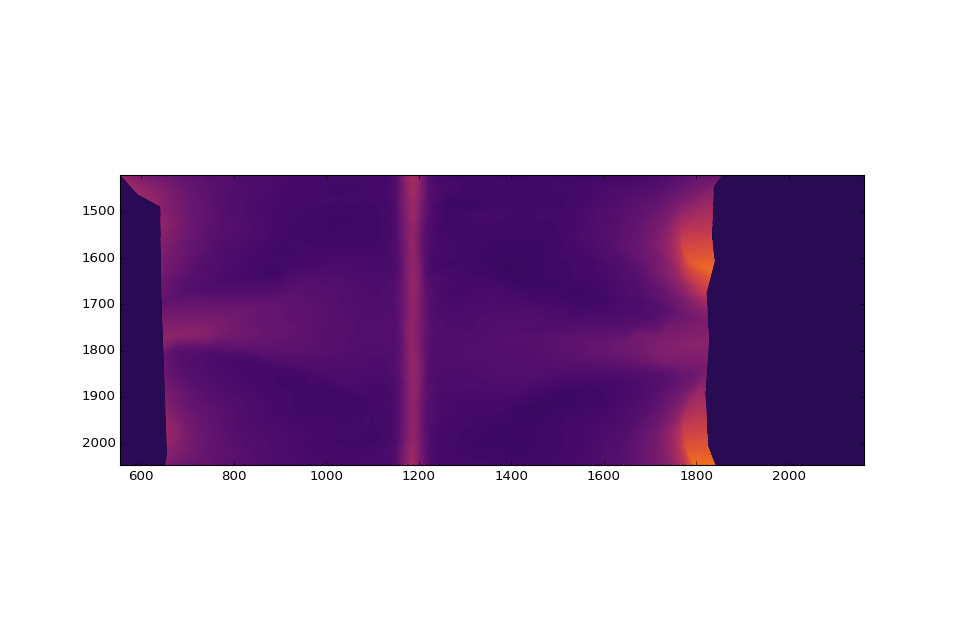

In [64]:
s=s0506_15_355
s.plot_data_px()

In [66]:
s.set_origin(origin=(1749,1187), extent=[-10,10,-6,6])

<IPython.core.display.Javascript object>


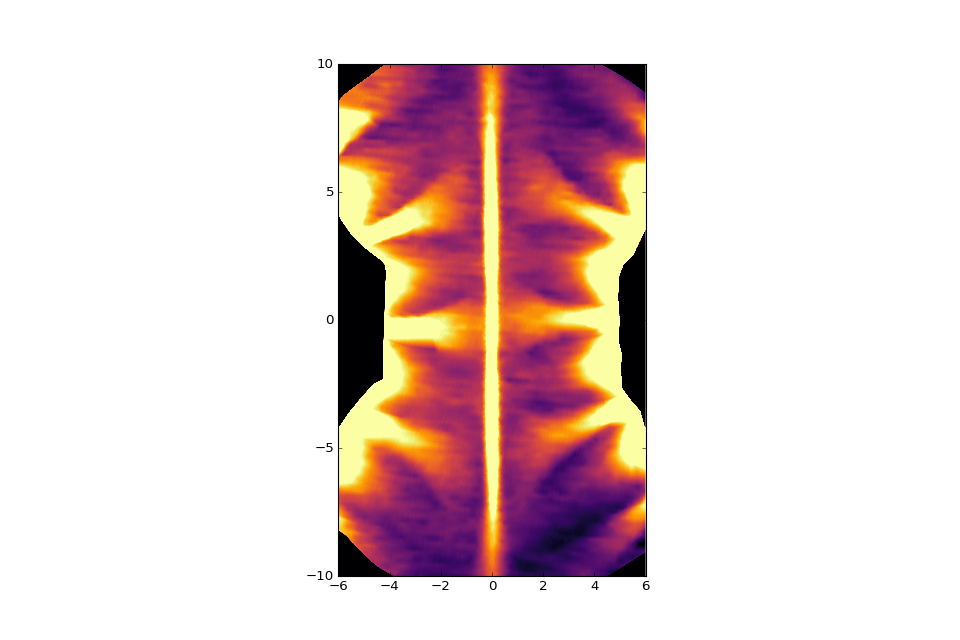

In [56]:
s.plot_data_mm(clim=[1,1e18])

<IPython.core.display.Javascript object>


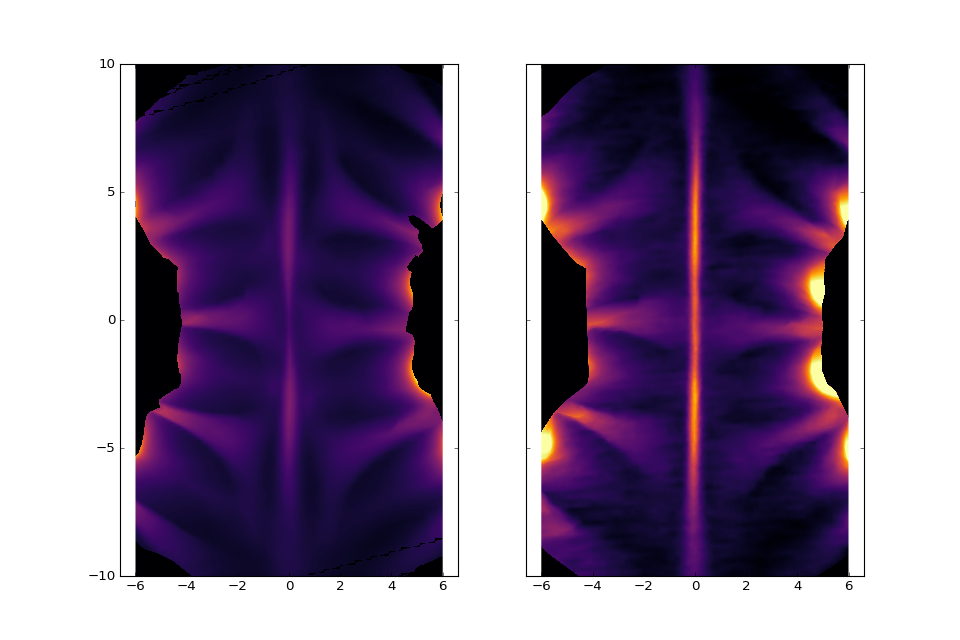

(-6, 6)

In [80]:
fig,ax=plt.subplots(1,2,figsize=(12,8), sharey=True)
s0506_15_532.plot_data_mm(ax=ax[0], clim=[0,3], multiply_by=1e-18)
s0506_15_355.plot_data_mm(ax=ax[1], clim=[0.12,3], multiply_by=1e-18)
ax[0].set_xlim([-6,6])

<IPython.core.display.Javascript object>


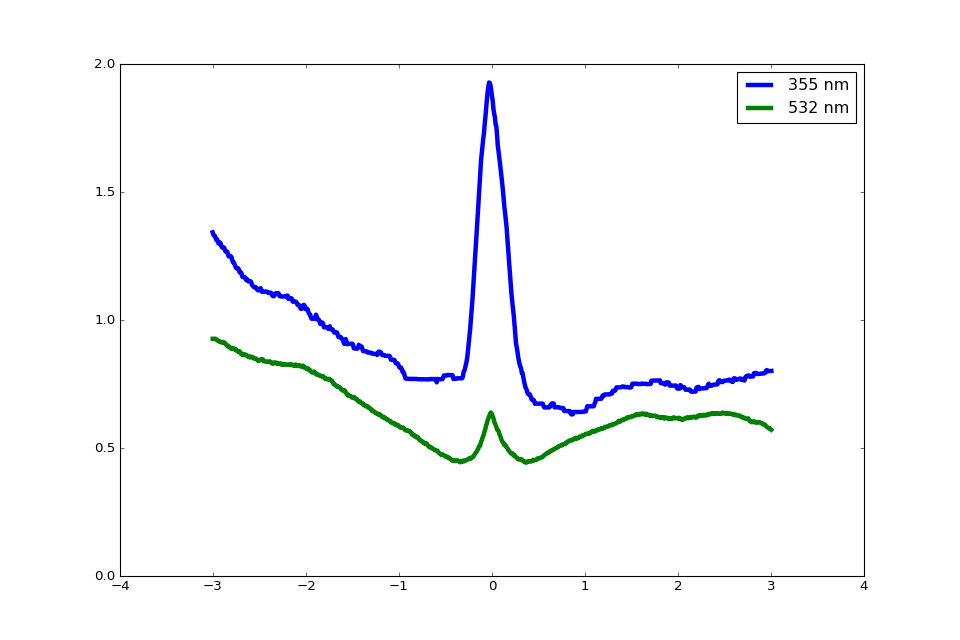

(1280, 384) (1280, 1152)
(1740, 522) (1740, 1566)


In [76]:
fig,ax=plt.subplots(figsize=(12,8))

s=s0506_15_355
s.create_lineout(start=(0,-3), end=(0,3), lineout_width=0.01*s.scale)
s.plot_lineout(ax=ax, label='355 nm', multiply_by=1e-18)

s=s0506_15_532
s.create_lineout(start=(0,-3), end=(0,3), lineout_width=0.01*s.scale)
s.plot_lineout(ax=ax, label='532 nm', multiply_by=1e-18)

ax.set_ylim([0,2])

ax.legend()

<IPython.core.display.Javascript object>


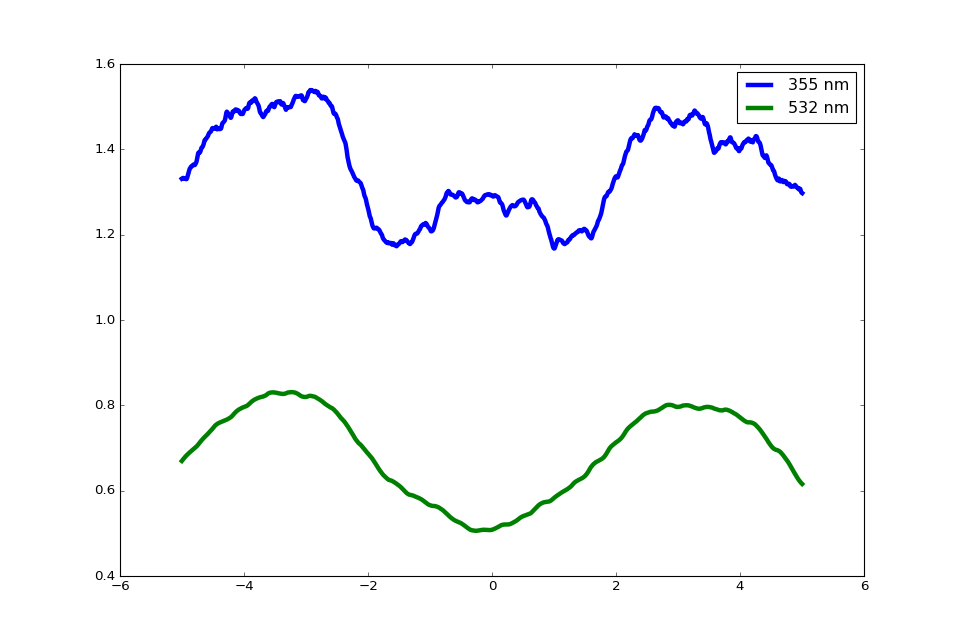

(1920, 768) (640, 768)
(2610, 1044) (870, 1044)


In [73]:
fig,ax=plt.subplots(figsize=(12,8))

s=s0506_15_355
s.create_lineout(start=(-5,0), end=(5,0), lineout_width=0.7*s.scale)
s.plot_lineout(ax=ax, label='355 nm', multiply_by=1e-18)

s=s0506_15_532
s.create_lineout(start=(-5,0), end=(5,0), lineout_width=0.7*s.scale)
s.plot_lineout(ax=ax, label='532 nm', multiply_by=1e-18)


ax.legend()

In [85]:
l=10
d=0.4

s=s0506_15_532

#tl, br of box
tl=s.mm_to_px((l,-d))
bl=s.mm_to_px((-l,-d))

tr=s.mm_to_px((l,d))
br=s.mm_to_px((-l,d))


#get left and right box edge densities and average the,
n_e1=s.data_c[tl[0]:br[0], tl[1]:br[1]].mean()

s=s0506_15_355

#tl, br of box
tl=s.mm_to_px((l,-d))
bl=s.mm_to_px((-l,-d))

tr=s.mm_to_px((l,d))
br=s.mm_to_px((-l,d))

#get left and right box edge densities and average the,
n_e2=s.data_c[tl[0]:br[0], tl[1]:br[1]].mean()

In [87]:
n_e1, n_e2

(5.3947221561543866e+17, 1.0534569460027901e+18)

In [90]:
l=7
V_in=50e3
dt=20e-9

dd=V_in*dt*1e3
#tl, br of box
tl=s.mm_to_px((l,-d-dd))
bl=s.mm_to_px((-l,-d-dd))

tr=s.mm_to_px((l,-d))
br=s.mm_to_px((-l,-d))


#get left and right box edge densities and average the,
n_e0=s.data_c[tl[0]:br[0], tl[1]:br[1]].mean()


In [93]:
n_e0*dd*2*l

6.8789168549500764e+18

In [98]:
n_e1*2*d*2*l+n_e0*dd*2*l

1.2921005669842989e+19

In [97]:
n_e2*2*d*2*l

1.179871779523125e+19

In [99]:
dd

1.0